# Proyecto Final Cloud
## Aplicando Machine Learning para predecir las actividades diarias de una persona.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#Leemos la data
persona = pd.read_csv('personaB.csv', sep=";")

#Imprimimos la cabecera
print "Datos:"
print persona.head(40)
#print persona['Actividad'].unique()
#print persona.columns


Datos:
   inicio_fecha inicio_hora final_fecha final_hora      Actividad
0    2012-11-11    21:14:00  2012-11-12   00:22:59  Spare_Time/TV
1    2012-11-12    00:24:00  2012-11-12   00:43:59  Spare_Time/TV
2    2012-11-12    00:48:00  2012-11-12   00:49:59       Grooming
3    2012-11-12    00:50:00  2012-11-12   01:51:59  Spare_Time/TV
4    2012-11-12    01:52:00  2012-11-12   01:52:59       Grooming
5    2012-11-12    01:53:00  2012-11-12   01:53:59      Toileting
6    2012-11-12    01:54:00  2012-11-12   09:31:59       Sleeping
7    2012-11-12    09:37:00  2012-11-12   09:38:59      Toileting
8    2012-11-12    09:42:00  2012-11-12   09:52:59      Breakfast
9    2012-11-12    09:56:00  2012-11-12   10:15:59  Spare_Time/TV
10   2012-11-12    10:18:00  2012-11-12   10:20:59       Grooming
11   2012-11-12    10:21:00  2012-11-12   10:29:59      Showering
12   2012-11-12    10:33:00  2012-11-12   10:34:59       Grooming
13   2012-11-12    10:35:00  2012-11-12   10:35:59      Toileting
14 

In [2]:
import time
from datetime import datetime
from dateutil import parser
from sklearn import preprocessing

#Convertimos una variable categorica a una variable numerica.
encoder_actividad = preprocessing.LabelEncoder()
persona.Actividad = encoder_actividad.fit_transform(persona.Actividad)

#Agregar una nueva columna que sera la variable numerica de 'Activity'
persona['Actividad_numero'] = persona['Actividad']

#Volvemos de la variable numerica a categorica.
persona.Actividad = encoder_actividad.inverse_transform(persona.Actividad)

#Ver data
print persona.head(15)
#print persona['Actividad'].unique()

persona = persona[persona.Actividad != "Spare_Time/TV"]
persona = persona[persona.Actividad != "Grooming"]
persona = persona[persona.Actividad != "Snack"]
persona = persona[persona.Actividad != "Toileting"]
persona = persona[persona.Actividad != "Showering"]
persona = persona[persona.Actividad != "Dinner"]
#persona = persona[persona.Actividad != "Leaving"]
#Ver la nueva data
#print persona[['Actividad','Actividad_numero']]


   inicio_fecha inicio_hora final_fecha final_hora      Actividad  \
0    2012-11-11    21:14:00  2012-11-12   00:22:59  Spare_Time/TV   
1    2012-11-12    00:24:00  2012-11-12   00:43:59  Spare_Time/TV   
2    2012-11-12    00:48:00  2012-11-12   00:49:59       Grooming   
3    2012-11-12    00:50:00  2012-11-12   01:51:59  Spare_Time/TV   
4    2012-11-12    01:52:00  2012-11-12   01:52:59       Grooming   
5    2012-11-12    01:53:00  2012-11-12   01:53:59      Toileting   
6    2012-11-12    01:54:00  2012-11-12   09:31:59       Sleeping   
7    2012-11-12    09:37:00  2012-11-12   09:38:59      Toileting   
8    2012-11-12    09:42:00  2012-11-12   09:52:59      Breakfast   
9    2012-11-12    09:56:00  2012-11-12   10:15:59  Spare_Time/TV   
10   2012-11-12    10:18:00  2012-11-12   10:20:59       Grooming   
11   2012-11-12    10:21:00  2012-11-12   10:29:59      Showering   
12   2012-11-12    10:33:00  2012-11-12   10:34:59       Grooming   
13   2012-11-12    10:35:00  2012-

In [3]:
def datetime_to_int(dt_list):
    ftr = [3600,60,1]
    return [sum([a*b for a,b in zip(ftr, map(int,x.split(':')))]) for x in dt_list]

inicio_hora = datetime_to_int(persona['inicio_hora'])
final_hora = datetime_to_int(persona['final_hora'])

#print inicio_hora
persona['inicio_hora_n'] = inicio_hora
persona['final_hora_n'] = final_hora

#Extraemos las columnas importantes para crear el modelo

persona[['inicio_hora','final_hora', 'Actividad','Actividad_numero']].head(40)
#persona.head(30)

,inicio_hora,final_hora,Actividad,Actividad_numero
6,01:54:00,09:31:59,Sleeping,6
8,09:42:00,09:52:59,Breakfast,0
24,13:47:00,14:53:59,Lunch,4
30,16:22:00,17:08:59,Leaving,3
45,01:30:00,08:52:59,Sleeping,6
46,08:56:00,09:04:59,Breakfast,0
50,09:53:00,10:11:59,Leaving,3
52,10:52:00,13:41:59,Leaving,3
55,14:08:00,14:42:59,Lunch,4
70,00:29:00,05:12:59,Sleeping,6


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


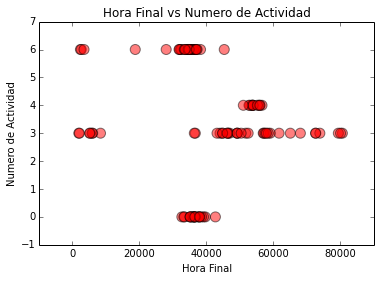

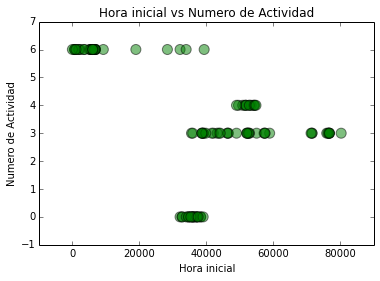

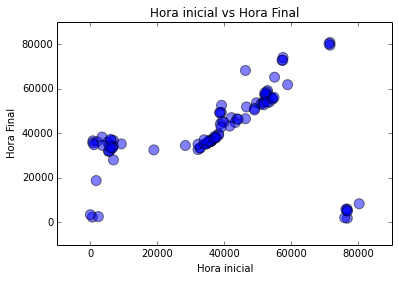

In [4]:
import numpy as np

X = persona[['inicio_hora_n','final_hora_n']]


#Ploteo
N = 50
colors = np.random.rand(N)
area = np.pi * (8 * 2**2 )
plt.scatter(persona['final_hora_n'], persona['Actividad_numero'], s=area, c=["red"], alpha=0.5)
plt.xlabel('Hora Final')
plt.ylabel('Numero de Actividad')
plt.title('Hora Final vs Numero de Actividad')
plt.show()

plt.scatter(persona['inicio_hora_n'], persona['Actividad_numero'], s=area, c=["green"], alpha=0.5)
plt.xlabel('Hora inicial')
plt.ylabel('Numero de Actividad')
plt.title('Hora inicial vs Numero de Actividad')
plt.show()


plt.scatter(persona['inicio_hora_n'], persona['final_hora_n'], s=area, c=["blue"], alpha=0.5)
plt.xlabel('Hora inicial')
plt.ylabel('Hora Final')
plt.title('Hora inicial vs Hora Final')
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split

# import some data to play with
#iris = datasets.load_iris()

X = persona[['inicio_hora_n','final_hora_n']]
Y = persona['Actividad_numero']

#Partimos la data, una conjunto para el training y otro para el testing(33%)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33)



In [6]:
#Creamos el modelo
model = linear_model.LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs')

#Ajustar el modelo segun los datos de entrenamiento.
model.fit(X_train, Y_train)

print "Score: ", model.score(X_test,Y_test)

#Predecimos los valores con datos entrenados
predictions = model.predict(X_test)

indices = Y_test.index.values
#print persona[['inicio_hora', 'final_hora', 'Actividad', 'Actividad_numero']].loc[indices]

resultados = persona[['inicio_hora', 'final_hora', 'Actividad']].loc[indices]
resultados["Prediccion"] = predictions

#Volvemos de la variable numerica a categorica.
resultados.Prediccion = encoder_actividad.inverse_transform(resultados.Prediccion)



#for i, prediction in enumerate(predictions):   
    #print 'Hora_i: %s, Hora_f: %s, Predecido: %s, Real: %d' % (prediction, Y_test.iloc[i])
    #print 'Predecido: %s, Real: %d' % (prediction, Y_test.iloc[i])
    
resultados = resultados.replace(['Breakfast', 'Lunch', 'Leaving', 'Sleeping'], 
                   ['Desayuno', 'Almuerzo', 'Salida', 'Durmiendo'])

print "\n>>>Resultados\n\n"
resultados



Score:  0.647058823529

>>>Resultados




/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2641: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


,inicio_hora,final_hora,Actividad,Prediccion
209,10:21:00,10:30:59,Desayuno,Salida
413,09:38:00,09:45:59,Desayuno,Salida
83,12:52:00,12:54:59,Salida,Salida
484,15:14:00,15:33:59,Almuerzo,Salida
207,01:25:00,09:58:59,Durmiendo,Durmiendo
160,21:19:00,00:31:59,Salida,Salida
170,14:50:00,14:57:59,Almuerzo,Salida
99,00:40:00,00:43:59,Durmiendo,Salida
390,11:04:00,12:27:59,Salida,Salida
123,00:58:00,10:37:59,Durmiendo,Durmiendo


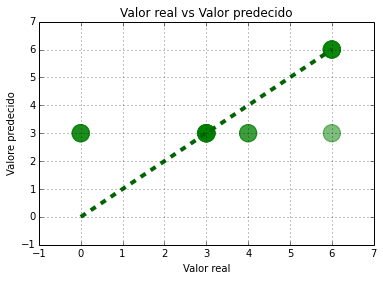

In [7]:
#Ploteando

plt.scatter(Y_test, predictions, alpha=0.3, color='green', s=300)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', color='darkgreen',lw=4)
plt.xlabel('Valor real')
plt.ylabel('Valore predecido')
plt.title('Valor real vs Valor predecido')
plt.grid(True)
plt.show()

# Despliegue de la informacion y la prediccion en una aplicacion web.


## Pasos:

### 1. Crear el modelo y enviar los datos medidos( por los sensores) y predecidos (por el modelo) al servidor

Para ese objetivo se envia los siguientes datos:
- Hora inicial.
- Hora final.
- Actividad.
- Y la Actividad predicha.

## 2. Graficar en el servidor los resultados

En el servidor, ubicado en una instancia en amazon, se recibira los datos para luego graficar los datos reales y las predicciones en tiempo real.







In [8]:
import urllib2
import urllib
import random
import time

def enviar(inicio_h, final_h, actividad, predecido):

    data = {}
    data["inicio_h"] = str(inicio_h)
    data["final_h"] = str(final_h)
    data["actividad"] = str(actividad)
    data["predecido"] = str(predecido)

    parametros = urllib.urlencode(data)
    url = 'http://openack.com/Projects/cloud/evaluacionB.php'
    full_url = url + '?' + parametros

    data = urllib2.urlopen(full_url)

#for x in range(50):
#    enviar()
#    time.sleep(1)

def main():
    resultados.sort_values(by=['inicio_hora'], ascending=[True], inplace=True)
    
    #print resultados.columns
    
    for index, row in resultados.iterrows():
        print row['inicio_hora'], row['final_hora'], row['Actividad'], row['Prediccion']
        enviar(row['inicio_hora'], row['final_hora'], 
               row['Actividad'], row['Prediccion'])
        time.sleep(0.5)
    
#main()

00:29:00 05:12:59 Durmiendo Durmiendo
00:40:00 00:43:59 Durmiendo Salida
00:58:00 10:37:59 Durmiendo Durmiendo
01:25:00 09:58:59 Durmiendo Durmiendo
01:34:00 09:40:59 Durmiendo Durmiendo
01:41:00 10:20:59 Durmiendo Durmiendo
01:51:00 09:16:59 Durmiendo Durmiendo
01:54:00 09:31:59 Durmiendo Durmiendo
01:55:00 07:46:59 Durmiendo Durmiendo
09:38:00 09:45:59 Desayuno Salida
09:57:00 10:03:59 Desayuno Salida
09:57:00 10:04:59 Desayuno Salida
10:20:00 10:30:59 Desayuno Salida
10:21:00 10:30:59 Desayuno Salida
10:38:00 11:01:59 Desayuno Salida
10:44:00 13:39:59 Salida Salida
10:45:00 13:39:59 Salida Salida
10:56:00 12:35:59 Durmiendo Salida
11:04:00 12:27:59 Salida Salida
11:34:00 11:59:59 Salida Salida
11:42:00 13:02:59 Salida Salida
12:10:00 12:53:59 Salida Salida
12:16:00 12:49:59 Salida Salida
12:52:00 12:54:59 Salida Salida
14:08:00 14:42:59 Almuerzo Salida
14:31:00 15:52:59 Salida Salida
14:36:00 15:59:59 Salida Salida
14:50:00 14:57:59 Almuerzo Salida
15:08:00 15:20:59 Almuerzo Salida
